# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.1.2


In [3]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [4]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [7]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [9]:
# looking at the shape of the data
data.shape

(614, 12)

In [10]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [11]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

In [12]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

## 2. Creating training and validation set

In [13]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [15]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,0.0,1.0,0.000000,1.0,0.0,0.113457,0.000000,0.095514,0.358974,1.0,1.0
171,0.0,1.0,1.000000,1.0,0.0,0.638380,0.000000,1.000000,0.615385,1.0,1.0
546,0.0,0.0,0.000000,0.0,0.0,0.039678,0.000000,0.102750,0.051282,1.0,0.5
226,0.0,1.0,0.000000,0.0,1.0,0.056710,0.000000,0.186686,0.743590,1.0,1.0
176,0.0,1.0,0.666667,1.0,0.0,0.023438,0.038856,0.133140,0.743590,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
560,0.0,1.0,0.666667,0.0,0.0,0.043599,0.005808,0.143271,0.743590,1.0,0.5
503,0.0,1.0,0.333333,0.0,0.0,0.048237,0.127247,0.186686,0.743590,1.0,0.0
343,0.0,1.0,1.000000,0.0,0.0,0.037390,0.000000,0.094067,0.743590,1.0,0.5
148,1.0,0.0,0.000000,1.0,0.0,0.121831,0.039984,0.312590,0.743590,1.0,0.0


## 3. Defining the architecture of the model

In [16]:
# checking the version of keras
import keras
print(keras.__version__)

2.10.0


In [17]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.10.0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [18]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [19]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [20]:
# number of input neurons
X_train.shape

(491, 11)

In [21]:
# number of features in the data
X_train.shape[1]

11

In [22]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

11

In [23]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer 

In [24]:
# define number of output neurons
output_neurons = 1

In [25]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [26]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 20
neuron_hidden_layer_2 = 10


In [27]:
# activation function of different layers

# for now we have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, we have used sigmoid activation function in the final layer

In [28]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [29]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [30]:
# number of parameters between input and first hidden layer
input_neurons*neuron_hidden_layer_1

220

In [31]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 20

240

In [32]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 10

210

In [33]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

11

## 4. Compiling the model (defining loss function, optimizer)

In [34]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [35]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 28ms/step - loss: 0.6530 - accuracy: 0.6680 - val_loss: 0.6323 - val_accuracy: 0.6992
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6823 - val_loss: 0.6137 - val_accuracy: 0.6992
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6088 - accuracy: 0.6843 - val_loss: 0.6008 - val_accuracy: 0.6992
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6843 - val_loss: 0.5882 - val_accuracy: 0.6911
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5810 - accuracy: 0.6884 - val_loss: 0.5777 - val_accuracy: 0.6992
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5681 - accuracy: 0.7006 - val_loss: 0.5676 - val_accuracy: 0.7073
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5549 - accuracy: 0.7251 - val_loss: 0.5576 - val_accuracy: 0.7154
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.8126 - val_loss: 0.4981 - val_accuracy: 0.8130
Epoch 60/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.8126 - val_loss: 0.5004 - val_accuracy: 0.8130
Epoch 61/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.8126 - val_loss: 0.4984 - val_accuracy: 0.8130
Epoch 62/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4412 - accuracy: 0.8126 - val_loss: 0.5010 - val_accuracy: 0.7967
Epoch 63/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.8126 - val_loss: 0.4996 - val_accuracy: 0.8049
Epoch 64/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4404 - accuracy: 0.8126 - val_loss: 0.5008 - val_accuracy: 0.8049
Epoch 65/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.8126 - val_loss: 0.5023 - val_accuracy: 0.8049
Epoch 

## 6. Evaluating model performance on validation set

In [36]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8187

accuracy: 81.87%


In [37]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7805

accuracy: 78.05%


In [38]:
model.save("Loan_Class.h5")

### Visualizing the model performance

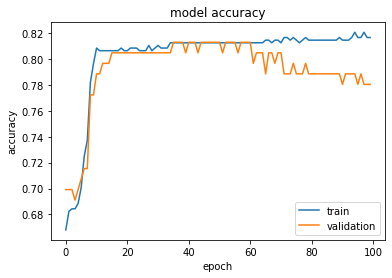

In [39]:
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

### Netron for Visualization

In [40]:
! pip install --upgrade netron

Defaulting to user installation because normal site-packages is not writeable


In [41]:
import netron

In [42]:
netron.start("Loan_Class.h5")

Serving 'Loan_Class.h5' at http://localhost:8080


('localhost', 8080)